# Machile Learning Assignment 1

<H4>Name: Vikrant Singh Jamwal
<H4>Class: 1MAI1 (Artificial Intelligence)
<H4>Student ID: 23104534

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

## Data Understanding and Exploration

In [3]:
df=pd.read_csv("Improved_All_Combined_hr_rsp_binary.csv") # Reading the data file

In [4]:
df.head() # To see top 5 rows of the dataset

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [5]:
df.shape # To check the number of rows and columns in the data set (rows, columns)

(112516, 5)

Visualising the range of each Column

In [6]:
dict={column: [min(df[column]), max(df[column])] for column in list(df.columns)} 
# Created a dictionary with minimum and maximum element of each row.

df_range= pd.DataFrame(dict.items(), columns=['Columns', 'Range'])
df_range


,Columns,Range
0,Participant,"[2, 35]"
1,HR,"[49.0, 146.78]"
2,respr,"[5.204728132, 18.16353247]"
3,Time(sec),"[1644227583, 1646842247]"
4,Label,"[0, 1]"


In [7]:
df.sample(frac=1) # shuffling to see various values

,Participant,HR,respr,Time(sec),Label
62291,20,83.77,12.056307,1646044102,1
18174,7,62.73,14.771508,1644835841,0
62446,20,71.08,11.990986,1646044257,0
111703,35,73.52,12.300017,1646841435,0
99600,32,73.05,14.599222,1646667975,0
...,...,...,...,...,...
65354,21,76.40,14.417298,1646050625,1
13808,6,71.22,13.358847,1644832051,0
13232,5,77.88,11.813984,1644832769,0
31343,11,101.35,12.042700,1644853690,1


Frequency of 0s and 1s are : 
0    75701
1    36815
Name: Label, dtype: int64


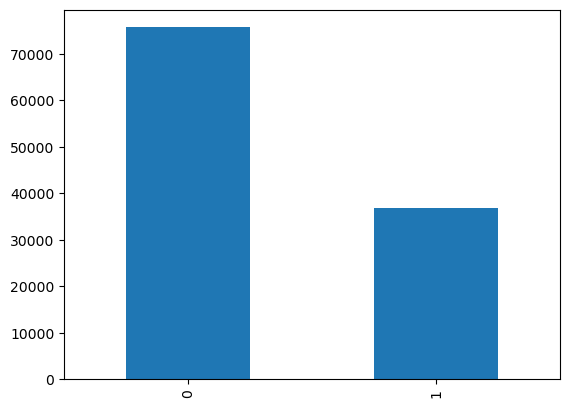

In [8]:
print(f'Frequency of 0s and 1s are : \n{df.Label.value_counts() }')
df['Label'].value_counts().plot.bar();

# data not imbalanced or mildly imbalanced which can be neglected

Checking the data types, as numerical data types are required to compare the features and object datatypes are either removed or transformed according to the importance of the features.

In [9]:
df.dtypes

Participant      int64
HR             float64
respr          float64
Time(sec)        int64
Label            int64
dtype: object

Checking and visualising top 5 null values in each column

In [10]:
df.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [11]:
df[['Label', 'HR']][df['HR'].isnull()].head()

,Label,HR
3555,0,NaN
3556,0,NaN
6865,0,NaN
10395,0,NaN
10396,0,NaN


Dropping the entire row which consists of a null value. Heart rate should not be imputed as different participants have different range of heart rates and imputed value can become an outlier for that participant.

In [12]:
df_cl=df.dropna() 

In [13]:
df_cl.isnull().sum() # checking again for null values

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

## Plotting a bar graph showing the correlation between each feature

<Axes: >

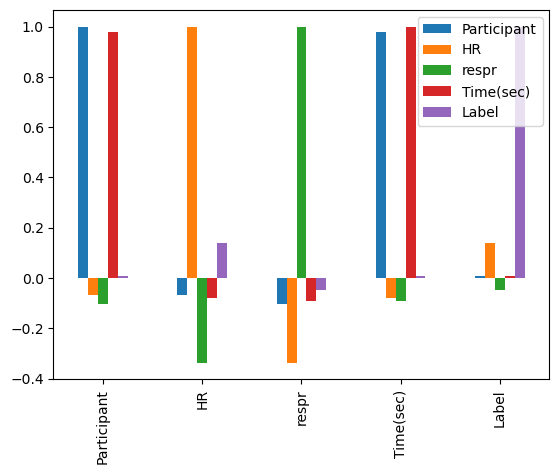

In [14]:
df_cl.corr().plot.bar()

## Plotting box plot for HR and respr grouped by Label

<Axes: title={'center': 'Time(sec)'}, xlabel='Label'>

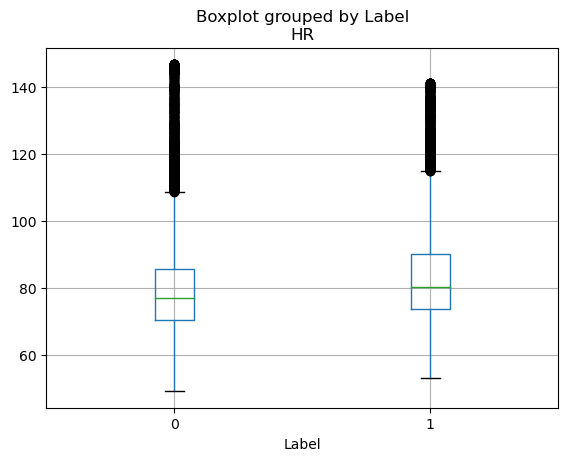

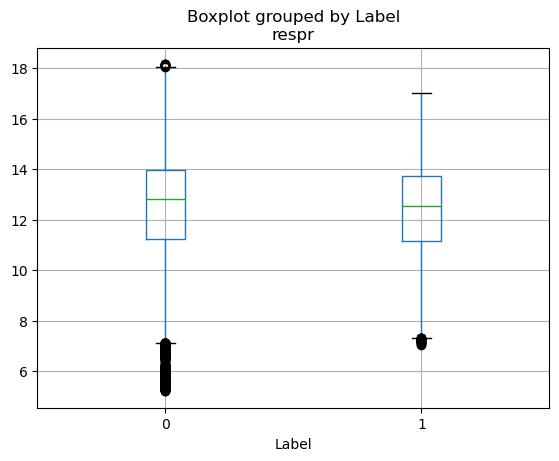

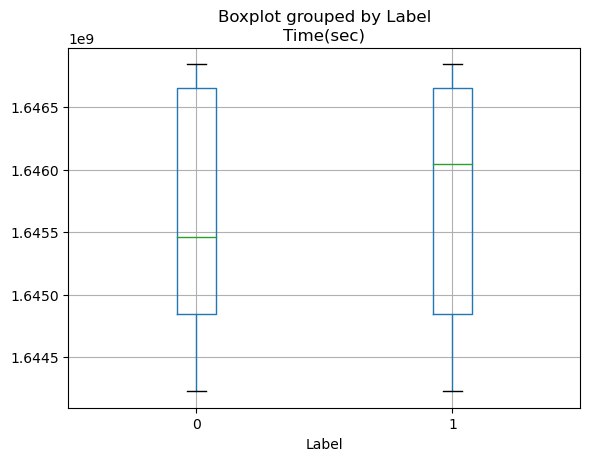

In [15]:
df_cl.boxplot(column='HR', by='Label')
df_cl.boxplot(column='respr', by='Label')
df_cl.boxplot(column='Time(sec)', by='Label')

Dropping participants column as Participant and Time(sec) are redundant features and one can be removed.

In [16]:
df_cl=df_cl.drop(['Participant'], axis=1)

In [60]:
# Changing format UNIX to Minutes
Time=[]
Time_s=[]
for i in df_cl['Time(sec)']:
    Time.append(datetime.utcfromtimestamp(i).strftime('%H%M%S')) # Removing date from the UNIX format.

# Using Minutes
for i in Time:
    Time_s.append(int(i[:2])*60+ int(i[2:4])+ int(i[4:])/60) # Calculating minutes
# Converted hours to minutes (hours*60) and seconds to minutes (seconds/60)

## Creating independent variable X and dependent variable y

In [61]:

X=df_cl.drop(['Label'],axis=1).drop(['Time(sec)'], axis=1)
y=df_cl['Label']

#UNIX time sec to timestamp
X['Minutes'] = Time_s

X.head()


,HR,respr,Minutes
0,118.00,12.127693,593.050000
1,113.50,12.127693,593.066667
2,93.00,12.127693,593.083333
3,93.25,12.127693,593.100000
4,86.40,12.127693,593.116667


Feature scaling using Standard Scaler

In [62]:
#feature scaling
scaler= StandardScaler()
df_scaled= scaler.fit_transform(X)
X = pd.DataFrame(df_scaled,columns=X.columns)

X.head()

,HR,respr,Minutes
0,2.967592,-0.16628,-1.478119
1,2.614156,-0.16628,-1.477987
2,1.004059,-0.16628,-1.477855
3,1.023694,-0.16628,-1.477723
4,0.485686,-0.16628,-1.477591


<Axes: >

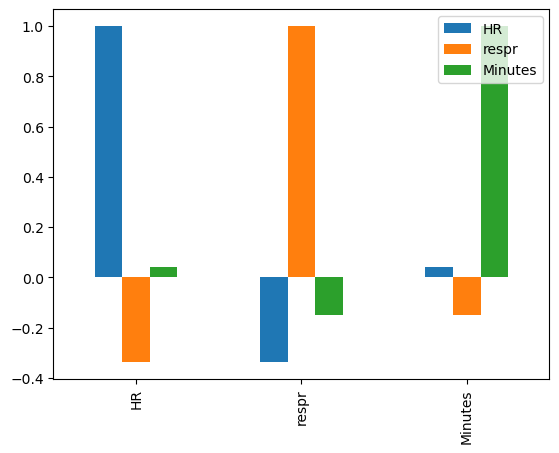

In [63]:
X.corr().plot.bar() # Correlation between independent variables.

## Splitting the data between train and test

In [64]:
train_X,test_X,train_y,test_y= train_test_split(X,y, test_size=0.1, stratify=y)

In [65]:
test_X.shape

(11248, 3)

In [66]:
train_X.head()

,HR,respr,Minutes
106255,0.693820,0.560598,0.883943
72521,-1.006600,0.277948,0.265616
45429,1.418757,-2.056320,0.115923
62435,-0.917848,-0.318324,-1.175694
81801,-0.158353,0.072323,1.635052


### Checking the distribution of data in test and train datasets

In [67]:
# Distribution in Training Data
train_y.value_counts()

0    68091
1    33133
Name: Label, dtype: int64

In [68]:
# Distribution in Testing Data
test_y.value_counts()

0    7566
1    3682
Name: Label, dtype: int64

# Creating Decision Tree and Random forest for this case

<H2>Decision Tree (Max Depth - 30 nodes)</H2>

In [69]:
# Decision Tree
# Fit/Train

clsf=DecisionTreeClassifier(max_depth=30)
clsf.fit(train_X, train_y)
print(f'Training Score: {clsf.score(train_X, train_y)}')

Training Score: 0.9805283332016123


In [70]:
# Predict
y_pred = clsf.predict(test_X)

In [28]:
# Test and Report

print(f'Accuracy: {accuracy_score( y_pred, test_y)}\n')
print(f'Report: \n {classification_report(y_pred, test_y)}')

Accuracy: 0.9815078236130867

Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7542
           1       0.98      0.97      0.97      3706

    accuracy                           0.98     11248
   macro avg       0.98      0.98      0.98     11248
weighted avg       0.98      0.98      0.98     11248



In [29]:
# Confusion matrix
print(confusion_matrix(y_pred, test_y))

[[7450   92]
 [ 116 3590]]


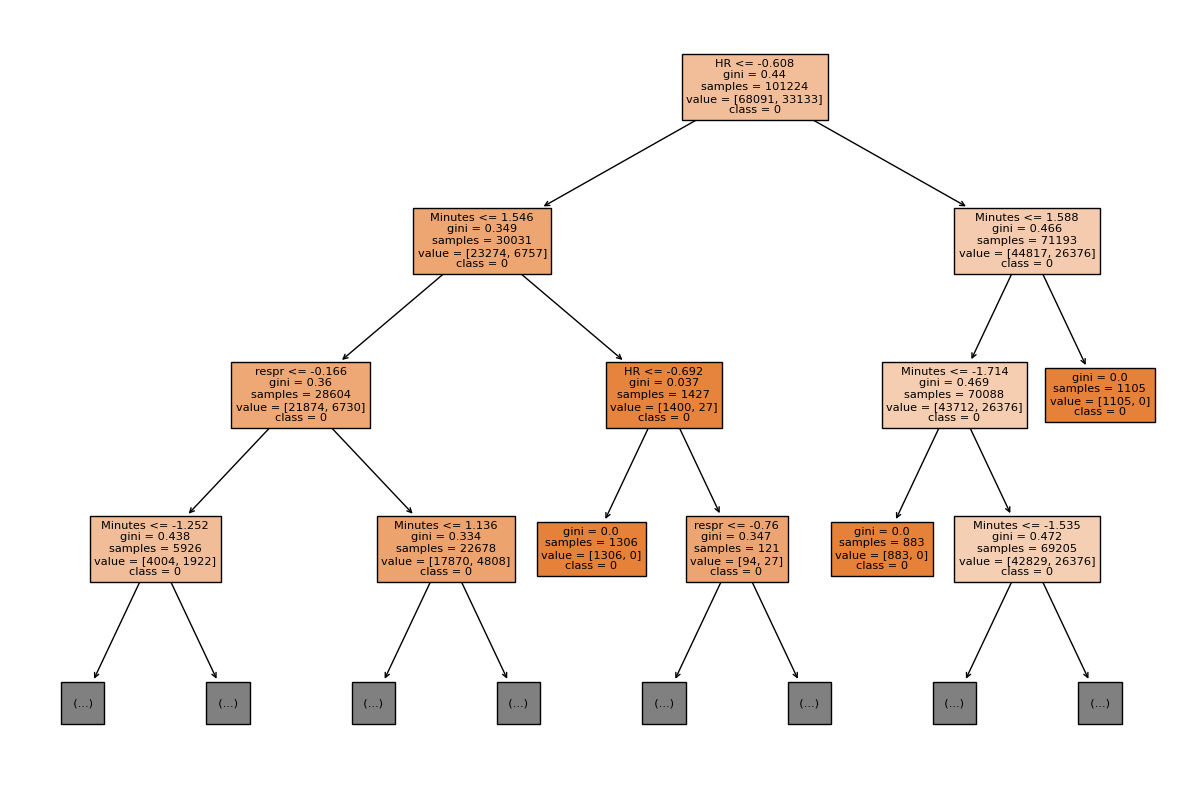

In [44]:
# Plotting a decision tree with max depth of 3.
plt.figure(figsize=(15,10))
tree.plot_tree(clsf, feature_names=['HR', 'respr','Minutes'], class_names=['0','1'], max_depth=3, filled=True)
plt.show()

<H2>Random Forest (Max depth - 30, Max trees - 20)</H2>

In [72]:
# Random Forest
# Fit or train
rf=RandomForestClassifier(n_estimators=20, max_depth=30)
rf.fit(train_X,train_y)
rf.score(train_X, train_y) # Training Score


0.9998221765589188

In [73]:
# Predict
pred_y3= rf.predict(test_X)

In [74]:
# Test and report
print(f'Accuracy: {accuracy_score(pred_y3, test_y)}\n')
print(f'Report: \n {classification_report(pred_y3, test_y)}')

Accuracy: 0.977151493598862

Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7685
           1       0.95      0.98      0.96      3563

    accuracy                           0.98     11248
   macro avg       0.97      0.98      0.97     11248
weighted avg       0.98      0.98      0.98     11248



In [75]:
print(confusion_matrix(pred_y3, test_y))

[[7497  188]
 [  69 3494]]


In [76]:
# To check the contribution of features in the model.

importances = rf.feature_importances_
print(f'Feature Scores: {importances}')

Feature Scores: [0.19507957 0.27726611 0.52765432]


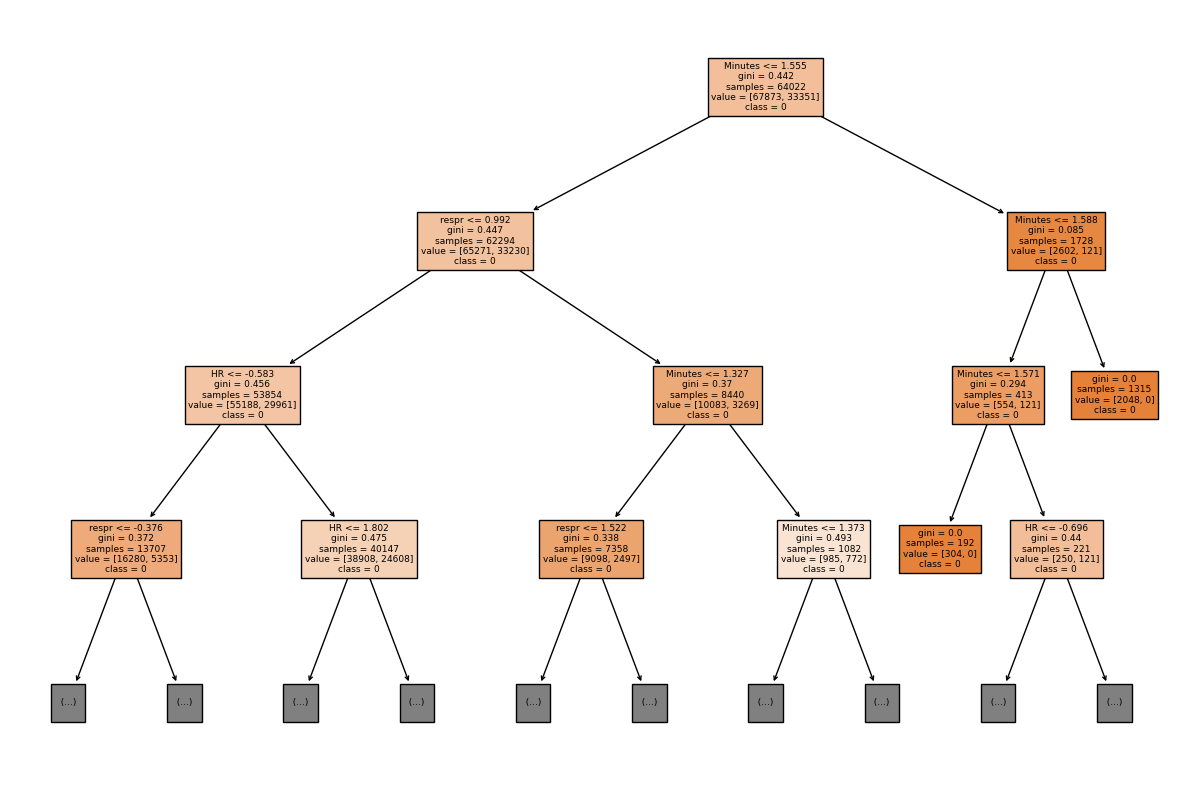

In [77]:
# Plotting 6th tree of Random Forest with max depth of 3.
plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[6] ,feature_names=['HR', 'respr','Minutes'], class_names=['0','1']
               ,filled=True, max_depth=3)
plt.show();

<H1>Reports</H1>

In [78]:
print("Decision Tree \n")
print(f'Training Score: {clsf.score(train_X,train_y)}') # Training Score
print(f'Accuracy: {accuracy_score( y_pred, test_y)}\n') # Accuracy Score
print(f'Report: \n {classification_report(y_pred, test_y)}') # Several metrics (Precision, recall, f1-score)

print("Random Forest \n")
print(f'Training Score: {rf.score(train_X,train_y)}') # Training Score
print(f'Accuracy: {accuracy_score(pred_y3, test_y)}\n') # Accuracy Score
print(f'Report: \n {classification_report(pred_y3, test_y)}') # Several metrics (Precision, recall, f1-score)

Decision Tree 

Training Score: 0.9805283332016123
Accuracy: 0.9722617354196301

Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7742
           1       0.93      0.98      0.96      3506

    accuracy                           0.97     11248
   macro avg       0.96      0.97      0.97     11248
weighted avg       0.97      0.97      0.97     11248

Random Forest 

Training Score: 0.9998221765589188
Accuracy: 0.977151493598862

Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7685
           1       0.95      0.98      0.96      3563

    accuracy                           0.98     11248
   macro avg       0.97      0.98      0.97     11248
weighted avg       0.98      0.98      0.98     11248



# Appendix

<H3>KNN with K=5</H3>

In [51]:
# Fit or train
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_X,train_y)

neigh.score(train_X,train_y)

0.9758654074132617

In [52]:
# Predict
pred_y4=neigh.predict(test_X)

In [53]:
# Test and report
print(f"Accuracy: {accuracy_score(pred_y4, test_y)}\n")
print(f"Report: \n {classification_report(pred_y4, test_y)}")

Accuracy: 0.9508357041251778

Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7607
           1       0.92      0.93      0.92      3641

    accuracy                           0.95     11248
   macro avg       0.94      0.95      0.94     11248
weighted avg       0.95      0.95      0.95     11248



<H3>KNN with K=3</H3>

In [54]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X,train_y)

neigh.score(train_X,train_y)

0.9802122026396902

In [55]:
pred_y5=neigh.predict(test_X)

In [56]:
print(f"Accuracy: {accuracy_score(pred_y5, test_y)}\n")
print(f"Report: \n {classification_report(pred_y5, test_y)}")

Accuracy: 0.965149359886202

Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7566
           1       0.95      0.95      0.95      3682

    accuracy                           0.97     11248
   macro avg       0.96      0.96      0.96     11248
weighted avg       0.97      0.97      0.97     11248



# Report

In [57]:
print("KNN (k=5)\n")
print(f"Accuracy: {accuracy_score(pred_y4, test_y)}\n")
print(f"Report: \n {classification_report(pred_y4, test_y)}")

print("KNN (k=3)\n")
print(f"Accuracy: {accuracy_score(pred_y5, test_y)}\n")
print(f"Report: \n {classification_report(pred_y5, test_y)}")

KNN (k=5)

Accuracy: 0.9508357041251778

Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7607
           1       0.92      0.93      0.92      3641

    accuracy                           0.95     11248
   macro avg       0.94      0.95      0.94     11248
weighted avg       0.95      0.95      0.95     11248

KNN (k=3)

Accuracy: 0.965149359886202

Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7566
           1       0.95      0.95      0.95      3682

    accuracy                           0.97     11248
   macro avg       0.96      0.96      0.96     11248
weighted avg       0.97      0.97      0.97     11248

